In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [46]:
f = lambda theta: 0.5 * ((theta[0] ** 2 - theta[1]) ** 2 + (theta[0] - 1) ** 2)
g = lambda theta: np.array([2 * theta[0] * (theta[0] ** 2 - theta[1]) + theta[0] - 1, theta[1] - theta[0] ** 2])

In [85]:
def update(theta):
    eta = 0.1
    return theta - eta * g(theta)

In [83]:
def update(theta):
    eta = 0.1
    a = g(theta)
    d = -a / np.linalg.norm(a)
    fun = lambda theta: f(theta + eta * d)
    eta = minimize(fun, 1).x
    return theta - eta * d

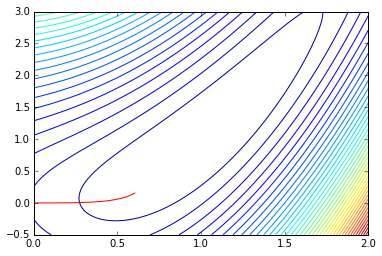

In [86]:
x = np.linspace(0.0, 2.0, 101)
y = np.linspace(-0.5, 3.0, 101)
X, Y = np.meshgrid(x, y)
Z = [[f([xx, yy]) for xx in x] for yy in y]
levels = np.linspace(np.min(Z), np.max(Z), 41)

thetas = [np.zeros(2)]

for i in range(12):
    thetas.append(update(thetas[-1]))    
    
thetas = np.array(thetas)

plt.contour(X, Y, Z, levels = levels)
plt.plot(thetas[:, 0], thetas[:, 1], color = 'red')
plt.show()